In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

nfl_data = pd.read_csv("C:/Users/Goobs/Desktop/data/NFL Play by Play 2009-2017 (v4).csv")
toDelete = ['ExPointResult','TwoPointConv','DefTwoPoint','Safety','Onsidekick','Passer','Passer_ID','QBHit','PassLocation','Interceptor','Rusher','Rusher_ID'
,'RunLocation','RunGap','Receiver','Receiver_ID','ReturnResult','Returner','BlockingPlayer','Tackler1','Tackler2','Challenge.Replay','ChalReplayResult'
,'Accepted.Penalty','PenalizedTeam','PenaltyType','PenalizedPlayer','Penalty.Yards','HomeTeam','AwayTeam','Timeout_Indicator','Timeout_Team','posteam_timeouts_pre'
,'HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','HomeTimeouts_Remaining_Post','AwayTimeouts_Remaining_Post','No_Score_Prob','Opp_Field_Goal_Prob'
,'Opp_Safety_Prob','Opp_Touchdown_Prob','Field_Goal_Prob','Safety_Prob','Touchdown_Prob','ExPoint_Prob','TwoPoint_Prob','ExpPts','EPA','airEPA','yacEPA'
,'Home_WP_pre','Away_WP_pre','Home_WP_post','Away_WP_post','Win_Prob','WPA','airWPA','yacWPA','SideofField','sp','PuntResult','RecFumbTeam','RecFumbPlayer'
,'AbsScoreDiff','FieldGoalDistance','TimeUnder','posteam','DefensiveTeam','PlayAttempted','FieldGoalResult','Sack','RushAttempt','PassAttempt','ScoreDiff','desc','Date','GameID', 'Season', 'GoalToGo', 'DefTeamScore' ]

for x in toDelete:
    del nfl_data[x]

D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
featuresWithNulls = nfl_data[nfl_data.columns[nfl_data.isnull().any()]]

for col in featuresWithNulls:
    print(col)
    print(nfl_data[col].isnull().sum()) 

down
61154
time
224
TimeSecs
224
PlayTimeDiff
444
yrdln
840
yrdline100
840
FirstDown
28811
PassOutcome
239506
PassLength
240520
PosTeamScore
26904


In [4]:
df = nfl_data.dropna()
df = df.replace({'PassOutcome': {'Complete': 1, 'Incomplete Pass': 0}})
df = df.replace({'PassLength' : {'Short' : 0, 'Deep' : 1}})
df = df.replace({'PlayType' : {'Pass': 1, 'No Play' : 0, 'Punt' : 2, 'Sack' : 3, 'Kickoff' : 4, 'Run' : 5, 'Half End' : 6}})

df = df.reset_index()
df

,index,Drive,qtr,down,time,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,Touchdown,PlayType,PassOutcome,PassLength,AirYards,YardsAfterCatch,InterceptionThrown,Reception,Fumble,PosTeamScore
0,1,1,1,1.0,14:53,3593.0,7.0,42.0,58.0,10,...,0,1,1,0,-3,8,0,1,0,0.0
1,3,1,1,3.0,13:35,3515.0,41.0,44.0,56.0,8,...,0,1,0,1,34,0,0,0,0,0.0
2,6,2,1,2.0,12:40,3460.0,36.0,2.0,98.0,10,...,0,1,1,0,3,1,0,1,0,0.0
3,9,3,1,1.0,11:24,3384.0,10.0,43.0,43.0,10,...,0,1,1,0,-2,5,0,1,0,0.0
4,10,3,1,2.0,10:48,3348.0,36.0,40.0,40.0,7,...,0,1,1,0,-1,11,0,1,0,0.0
5,12,3,1,2.0,09:43,3283.0,38.0,31.0,31.0,11,...,0,1,1,0,-2,11,0,1,0,0.0
6,16,4,1,1.0,07:57,3177.0,23.0,42.0,42.0,10,...,0,1,1,1,16,4,0,1,0,0.0
7,18,4,1,2.0,06:57,3117.0,27.0,19.0,19.0,7,...,0,1,0,0,3,0,0,0,0,0.0
8,19,4,1,3.0,06:52,3112.0,5.0,19.0,19.0,7,...,0,1,0,0,1,0,0,0,0,0.0
9,25,6,1,1.0,04:49,2989.0,13.0,26.0,74.0,10,...,0,1,1,0,1,9,0,1,0,0.0


In [5]:
yes = 0
no = 0
for z in df['InterceptionThrown']:
    if z == 1:
        yes += 1
    else:
        no+=1
print(yes)
print(no)

index = 0
count = 0

while count < 158000:
    for x in df['InterceptionThrown']:
        if x == 0:
            df.drop(df.index[index])
            count+=1
        index+=1
    
feats = ['down', 'FirstDown', 'qtr', 'yrdln', 'yrdline100', 'ydsnet', 'Drive', 'Yards.Gained', 'Touchdown', 'PlayType', 'PassOutcome', 'PassLength', 'AirYards', 'Reception', 'Fumble']
x = df[feats]
y = df['InterceptionThrown']


4451
162702


KeyboardInterrupt: 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35,random_state=3)

In [157]:
rf = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 3)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
rfacc = accuracy_score(y_test,rfpred)
print(rfacc)

0.9784630110761657


In [158]:
dt = DecisionTreeClassifier(random_state =3)
dt.fit(x_train, y_train)
dtPredict = dt.predict(x_test)
dtacc = accuracy_score(y_test, dtPredict)
print(dtacc)

0.9624982907151648


In [159]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

predict = logreg.predict(x_test)

acc = accuracy_score(y_test, predict)

print(acc)

0.9721044714891289


In [132]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [133]:
logprob = logreg.predict_proba(x_test)
dtprob = dt.predict_proba(x_test)
rfprob = rf.predict_proba(x_test)

fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,logprob[:,1], pos_label=1)

AUC1 = metrics.auc(fpr1, tpr1)

print(AUC1)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test,dtprob[:,1], pos_label=1)

AUC2 = metrics.auc(fpr2, tpr2)

print(AUC2)

fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test,rfprob[:,1], pos_label=1)

AUC3 = metrics.auc(fpr3, tpr3)

print(AUC3)

0.9882773614833451
0.9526062462396762
0.9901041951539681


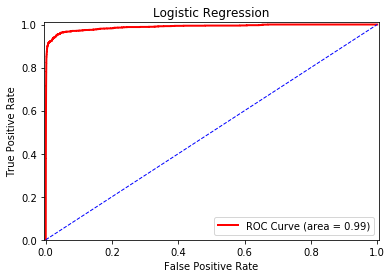

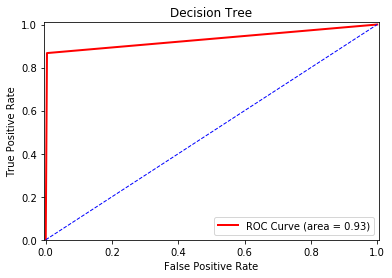

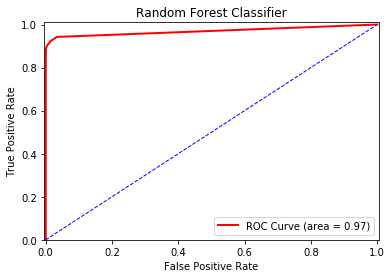

In [156]:
%matplotlib inline

plt.figure()

plt.plot(fpr1, tpr1, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC1)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")

plt.show()

%matplotlib inline

plt.figure()

plt.plot(fpr2, tpr2, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.legend(loc="lower right")

plt.show()

%matplotlib inline

plt.figure()

plt.plot(fpr3, tpr3, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC3)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.legend(loc="lower right")

plt.show()

In [135]:
feats = ['down', 'FirstDown', 'qtr','yrdline100', 'Drive', 'TimeSecs', 'ydstogo']
x = df[feats]
y = df['InterceptionThrown']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35,random_state=3)

In [136]:
rf = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 3)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
rfacc = accuracy_score(y_test,rfpred)
print(rfacc)

0.7296274738067521


In [137]:
dt = DecisionTreeClassifier(random_state =3)
dt.fit(x_train, y_train)
dtPredict = dt.predict(x_test)
dtacc = accuracy_score(y_test, dtPredict)
print(dtacc)

0.6667636786961583


In [138]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

predict = logreg.predict(x_test)

acc = accuracy_score(y_test, predict)

print(acc)

0.7558207217694994


In [139]:
logprob = logreg.predict_proba(x_test)
dtprob = dt.predict_proba(x_test)
rfprob = rf.predict_proba(x_test)

fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,logprob[:,1], pos_label=1)

AUC1 = metrics.auc(fpr1, tpr1)

print(AUC1)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test,dtprob[:,1], pos_label=1)

AUC2 = metrics.auc(fpr2, tpr2)

print(AUC2)

fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test,rfprob[:,1], pos_label=1)

AUC3 = metrics.auc(fpr3, tpr3)

print(AUC3)

0.7911731526554723
0.6621880640485697
0.7860683421757917


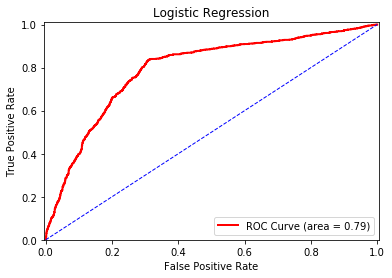

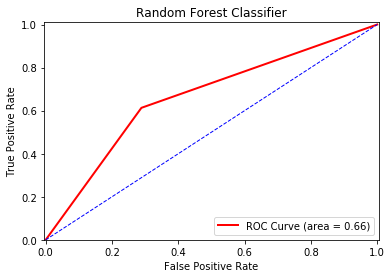

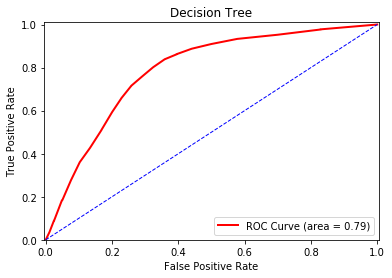

In [140]:
%matplotlib inline

plt.figure()

plt.plot(fpr1, tpr1, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC1)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")

plt.show()

%matplotlib inline

plt.figure()

plt.plot(fpr2, tpr2, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.legend(loc="lower right")

plt.show()

%matplotlib inline

plt.figure()

plt.plot(fpr3, tpr3, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC3)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.legend(loc="lower right")

plt.show()